In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
%matplotlib inline


import seaborn as sb

#read and randomly shuffle data
winequality = pd.read_csv('winequality-white.csv', sep=';')

winequality = winequality.values
winequality = winequality[np.random.permutation(winequality.shape[0]),:]

#80% - 20% split for the training and testing sets
tr_set_size = int(len(winequality)*0.8)

#assign train and test sets (in your experiments, you want to do cross-validation)
X_tr = winequality[0:tr_set_size,:11]
y_tr = winequality[0:tr_set_size,11]
X_test = winequality[tr_set_size:,:11]
y_test = winequality[tr_set_size:,11]

winequality_csv = pd.read_csv('winequality-white.csv', sep=';')

#check the information of the dataset
winequality_csv.head()
winequality_csv.info()
winequality_csv.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


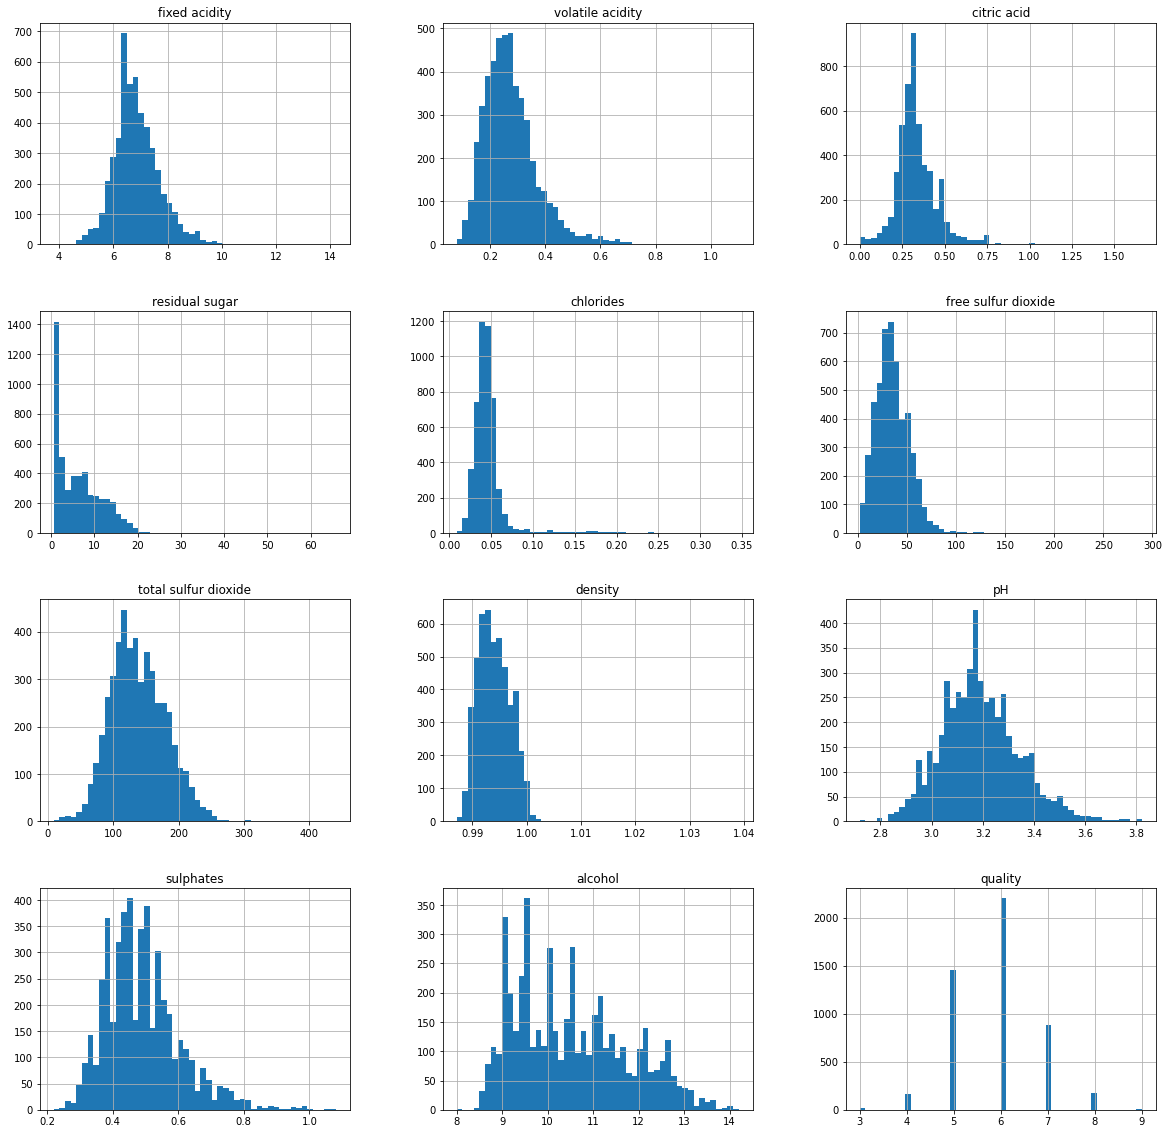

In [7]:
#Use of graphics for a better understanding of the data

winequality_csv.hist(bins=50,figsize=(20,20))
# display histogram
pl.show()

Text(0, 0.5, 'alcohol')

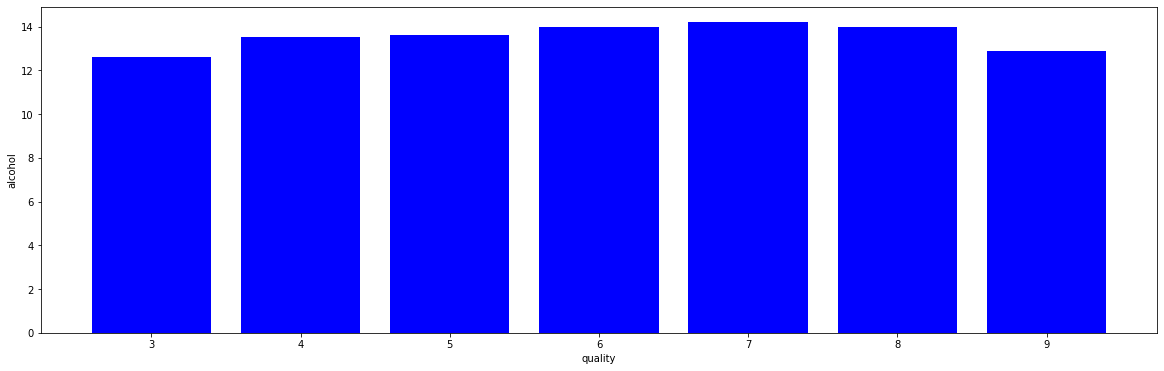

In [8]:
#
pl.figure(figsize=[20,6])
pl.bar(winequality_csv['quality'],winequality_csv['alcohol'],color='blue')
pl.xlabel('quality')
#label y-axis
pl.ylabel('alcohol')

#Using a heatmap helps us to see if there are any values which do not affect the quality of the wine, or which ones affects it most, and understand the correlation between columns. I choose to use seaborn as I found more information about it

<AxesSubplot:>

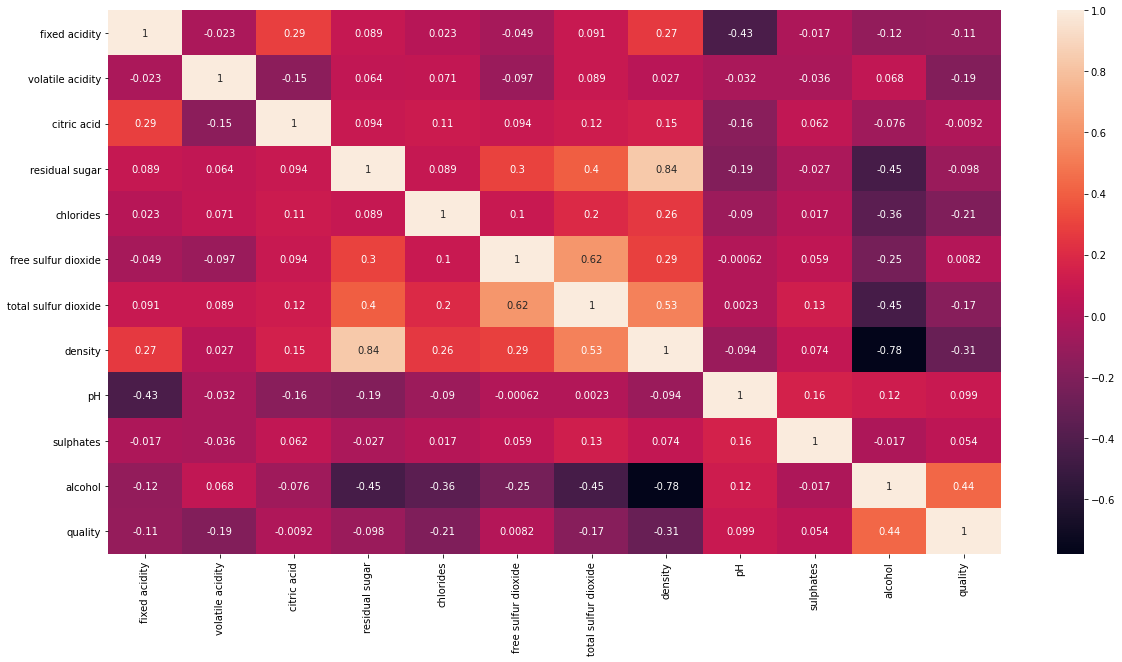

In [9]:
# ploting heatmap
pl.figure(figsize=[20,10])
sb.heatmap(winequality_csv.corr(),annot=True)

As the correlations with 'quality' are very low we can gather that the quality of the white wine might be a subjective factor, so the models might not be very succesfull. As we can see, there is a negative correlation between density and alcohol. So we can take one of them off from running the models. This is because as the have a similar correlation, they affect on the model´s accuracy on a similar way

In [10]:
for a in range(len(winequality_csv.corr().columns)):
    for b in range(a):
        if abs(winequality_csv.corr().iloc[a,b]) >0.7:
            name = winequality_csv.corr().columns[a]
            print(name)

density
alcohol


In [11]:
new_winequality_csv=winequality_csv.drop('density',axis=1)

We check if there are null values wich might affect the models.

In [12]:
new_winequality_csv.isnull().sum()

print('NULL VALUES: \n', new_winequality_csv.isnull().sum())
print('\n Total null values: \n', new_winequality_csv.isnull().sum().sum())

NULL VALUES: 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 Total null values: 
 0


There are no null numbers on our datasheet, but if there were, we could just fill that gap with the mean of the column it belongs to, so that null (0) number would not affect the others in the model.

In [13]:
new_winequality_csv.update(new_winequality_csv.fillna(new_winequality_csv.mean()))

We can also see that the category which is more related with the quality of the wine is 'alcohol', so this category will affect the model more


Text(0, 0.5, 'alcohol')

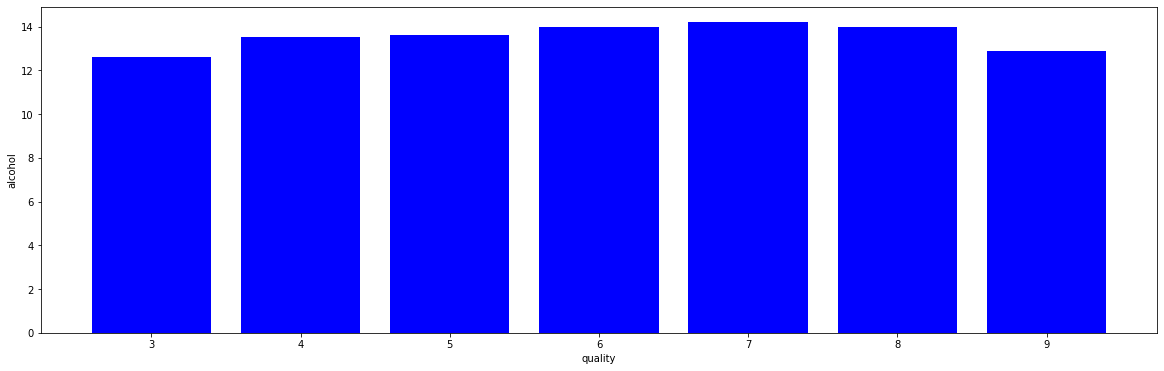

In [14]:

pl.figure(figsize=[20,6])
pl.bar(new_winequality_csv['quality'],new_winequality_csv['alcohol'],color='blue')
pl.xlabel('quality')
#label y-axis
pl.ylabel('alcohol')



<AxesSubplot:xlabel='quality', ylabel='alcohol'>

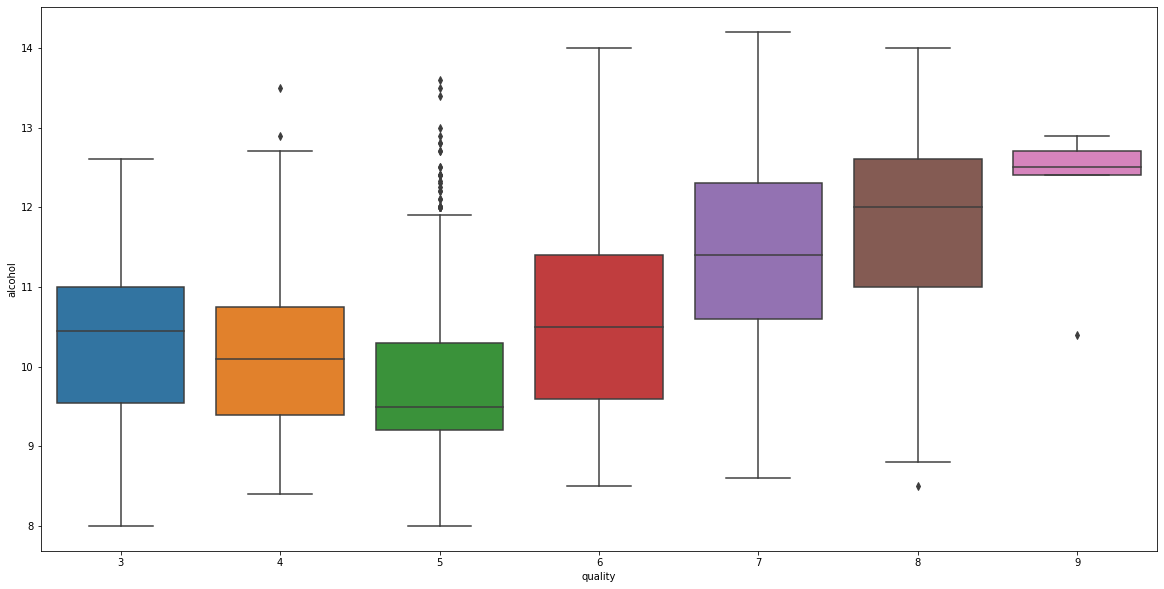

In [15]:
pl.figure(figsize=[20,10])
sb.boxplot(x='quality', y='alcohol', data = new_winequality_csv)

 As we can see alcohol has a negative relationship on the lower qualities but a positive relation on the higher ones.

The values of 'quality' go from 3 to 9, so I encoded the 'quality' to go from 0 to 6.

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

new_winequality_csv['quality'] = encoder.fit_transform(new_winequality_csv['quality'])
{index: label for index, label in enumerate(encoder.classes_)}

{0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}

We divide our data into the correct form, two different variables: the result (quality) and the rest of the columns

In [17]:
y = new_winequality_csv['quality']
X = new_winequality_csv.drop('quality', axis = 1)
y

0       3
1       3
2       3
3       3
4       3
       ..
4893    3
4894    2
4895    3
4896    4
4897    3
Name: quality, Length: 4898, dtype: int64

Scaling the data to ensure that any feature does not have more importance than others.Now, our data will be standard normally distributed data: zero mean and unit variance.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,1.004955,-0.962605,1.857572


I divided the data into training sets (80%) and testing sets (20%)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

As we are going to use different models, we replicate our data

In [21]:
import copy
X_trainN = copy.deepcopy(X_train)
X_testN = copy.deepcopy(X_test)
y_trainN = copy.deepcopy(y_train)
y_testN = copy.deepcopy(y_train)

# Model 1: Artificial Neural Network

In [22]:
#Training
columns = X.shape[1] #Number of columns (X = data)
columns

10

In [23]:
qualityValues = y.unique()
nValues = len(qualityValues) #Number of different Values (0-6)
nValues

7

In [24]:
#ARTIFICIAL NEURAL NETWORK using TensorFlow

#This model has been optimized with different parameters, the following ones have worked best

input = tf.keras.Input(shape=(columns,))
x = tf.keras.layers.Dense(32, activation = 'relu' )(input)
x = tf.keras.layers.Dense(16, activation = 'relu' )(x)

output = tf.keras.layers.Dense(nValues, activation = 'softmax')(x)

model = tf.keras.Model(inputs = input, outputs = output)

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adamax', metrics=['accuracy'])

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(X_trainN, y_trainN, epochs=130, validation_split=0.2, callbacks=[es_callback])



Epoch 1/130
98/98 [==============================] - 2s 4ms/step - loss: 1.7197 - accuracy: 0.3660 - val_loss: 1.5245 - val_accuracy: 0.4732
Epoch 2/130
98/98 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.4652 - val_loss: 1.3336 - val_accuracy: 0.4911
Epoch 3/130
98/98 [==============================] - 0s 2ms/step - loss: 1.2904 - accuracy: 0.4860 - val_loss: 1.2386 - val_accuracy: 0.5038
Epoch 4/130
98/98 [==============================] - 0s 2ms/step - loss: 1.2239 - accuracy: 0.5038 - val_loss: 1.1910 - val_accuracy: 0.5153
Epoch 5/130
98/98 [==============================] - 0s 3ms/step - loss: 1.1880 - accuracy: 0.5172 - val_loss: 1.1627 - val_accuracy: 0.5230
Epoch 6/130
98/98 [==============================] - 0s 2ms/step - loss: 1.1646 - accuracy: 0.5236 - val_loss: 1.1430 - val_accuracy: 0.5357
Epoch 7/130
98/98 [==============================] - 0s 2ms/step - loss: 1.1473 - accuracy: 0.5338 - val_loss: 1.1269 - val_accuracy: 0.5536
Epoch 8/130
9

In [25]:
ANN_loss, ANN_acc = model.evaluate(X_test, y_test, verbose = 2)



31/31 - 0s - loss: 1.1586 - accuracy: 0.5316 - 143ms/epoch - 5ms/step


We could only obtain an accuracy of 53% , so ANN is not a good classifier algorithm for this dataset. (In this case more epochs do not mean more accuracy or less error.
As we can observe, the difference between "accuracy" and "val_accuracy" is big. This means our model has "learned the data too well". To solve this, I added several parameters to the ANN, like the EarlyStopping callback (because after validation loss increases, the model will only get worse). I simplified the model (to only 2 hidden layers of 64 neurons) to decrease the complexity. I also tried to add a Dropout layer, so there would be more "luck" as some connections would drop, but this did not work.

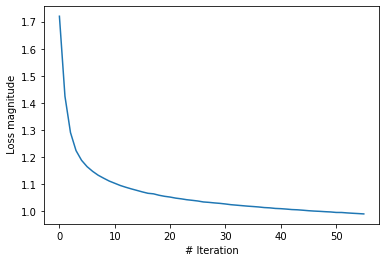

In [26]:
pl.xlabel("# Iteration")
pl.ylabel(" Loss magnitude")
pl.plot(history.history["loss"])

# MODEL 2: DECISION TREE

In [27]:
from sklearn import tree

#I divided the data into training sets (80%) and testing sets (20%)
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.2, random_state=10)

#This model has been optimized with different parameters, the following ones have worked best, most of the default attributes 
#worked better in this model.
model = tree.DecisionTreeClassifier(criterion="gini", splitter="best" ,random_state=25, min_samples_leaf=1)
model.fit(X_trainT, y_trainT)

DecisionTreeClassifier(random_state=25)

In [28]:
y_pred = model.predict(X_testT)
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testT, y_pred))


Accuracy: 0.6346938775510204


In [29]:
#This is a prediction of the first row of data (with  a quality of 6)
input_data = (7,0.27,0.36,20.7,0.045,45,170,3,0.45,8.8)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Force first data prediction: (might be in trained sample)",prediction+3, "/6")

print("\n Predicting result with non-trained data")
result = model.predict(X_testT.iloc[1:2])
y_is = (y_testT.iloc[1:2])
print("Predicted result is: ", str(result+3))
print("True quality is: ",str(y_is+3))



Force first data prediction: (might be in trained sample) [6] /6

 Predicting result with non-trained data
Predicted result is:  [7]
True quality is:  937    5
Name: quality, dtype: int64


As we can see, the model does not exactly get the same quality, but it is close to it. This model works better than ANN (62%) but still gets a poor result. If the first prediction is 6, it most probably means that this value was in the sample of test. 

In [30]:
##Clasifier for the trained data (this accuracy is not representative) 
_test = model.predict(X_trainT)
acc = metrics.accuracy_score(y_trainT, _test)
acc
#This is measuring the accuracy of the trained data, which does not reflect the accuracy with untrained data

1.0

# MODEL 3: K Nearest Neighbour

The first thing I tried is to found the best number of neighbours (k) that fits the model:

In [43]:
from sklearn.neighbors import KNeighborsClassifier as kn
#I divided the data into training sets (80%) and testing sets (20%)
X_trainNe, X_testNe, y_trainNe, y_testNe = train_test_split(X, y, test_size=0.2, random_state=20)

helper = []
for i in range(1,20):
    numberNeighbors = kn(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors = i).fit(X_trainNe,y_trainNe)
    prediction = numberNeighbors.predict(X_testNe)
    helper.append(metrics.accuracy_score(y_testNe, prediction))

print("Maximum accuracy: ",max(helper),"at K =", helper.index(max(helper))+1)

Maximum accuracy:  0.6346938775510204 at K = 1


In [44]:
N_model = kn(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=1)
N_model.fit(X_trainNe, y_trainNe)

#This is a prediction of the first row of data (with  a quality of 6)
input_data = (8.6,0.23,0.4,4.2,0.035,17,109,3.14,0.53,9.7)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = N_model.predict(input_data_reshaped)
print("Force first data prediction: ",prediction+3, "/6")


print("\n Predicting result with non-trained data")
result = model.predict(X_testNe.iloc[1:2])
y_is = (y_testNe.iloc[1:2])
print("Predicted result is: ", str(result+3))
print("True quality is: ",str(y_is+3))


Force first data prediction:  [3] /6

 Predicting result with non-trained data
Predicted result is:  [5]
True quality is:  2540    5
Name: quality, dtype: int64


The model with only one neighbour most of the times will choose a quality of "5", this is because the majority of the wines in the dataseet have a quality value of 6 or 5. But this is not optimal. Instead I will use a K of 5 neighbors.

In [41]:
#This model has been optimized with different parameters, the best results are with the following
X_trainNe, X_testNe, y_trainNe, y_testNe = train_test_split(X, y, test_size=0.15, random_state=20)
N_model = kn(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=5)
N_model.fit(X_trainNe, y_trainNe)
print(N_model.score(X_testNe, y_testNe))

0.564625850340136


In [42]:
input_data = (7,0.27,0.36,20.7,0.045,45,170,3,0.45,8.8)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = N_model.predict(input_data_reshaped)
print("Force first data prediction (might be in trained sample): ",prediction+3, "/6")

print("\n Predicting result with non-trained data")
result = model.predict(X_testNe.iloc[1:2])
y_is = (y_testNe.iloc[1:2])
print("Predicted result is: ", str(result+3))
print("True quality is: ",str(y_is+3))


Force first data prediction (might be in trained sample):  [5] /6

 Predicting result with non-trained data
Predicted result is:  [5]
True quality is:  2540    5
Name: quality, dtype: int64


In the same way as Decision Tree, the model should not exactly get the same quality, but it is also close to it

Trying to remove several columns to create test with less variables do  not improve the model

In [45]:
new_y = new_winequality_csv['quality']
new_X = new_winequality_csv.drop('fixed acidity', axis = 1)
new_X = new_winequality_csv.drop('chlorides', axis = 1)
new_X = new_winequality_csv.drop('pH', axis = 1)
new_X = new_winequality_csv.drop('quality', axis = 1)


In [46]:
X_trainNe, X_testNe, y_trainNe, y_testNe = train_test_split(new_X, new_y, test_size=0.2, random_state=20)
N_model = kn(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=5)

N_model.fit(X_trainNe, y_trainNe)
print(N_model.score(X_testNe, y_testNe))

0.46938775510204084


KNearestNeighbour only has an accuracy of 56%, so it is not a good classifier algorithm for this dataset

# MODEL 4: RANDOM FOREST

As the accuracy obtained with the previous models is not very high, I try to use a more complex model (Random Forest) 
based on decision trees but reducing overfitting (tend to training given data too well) 

In [47]:
###RANDOM FOREST
from sklearn import ensemble
#I divided the data into training sets (80%) and testing sets (20%)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(X, y, test_size=0.2, random_state=20)


modelF = ensemble.RandomForestClassifier(random_state=20, max_depth = 20, n_estimators = 30)
modelF.fit(X_trainF, y_trainF)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=20)

In [48]:
y_predF = modelF.predict(X_testF)
print("Accuracy:",metrics.accuracy_score(y_testF, y_predF))

Accuracy: 0.6846938775510204


In [49]:
#This is a prediction of the first row of data (with  a quality of 6)
input_data = (7,0.27,0.36,20.7,0.045,45,170,3,0.45,8.8)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelF.predict(input_data_reshaped)
print("Force first data prediction (might be in trained sample): ",prediction+3, "/6")

print("\n Predicting result with non-trained data")
result = model.predict(X_testF.iloc[1:2])
y_is = (y_testF.iloc[1:2])
print("Predicted result is: ", str(result+3))
print("True quality is: ",str(y_is+3))



Force first data prediction (might be in trained sample):  [6] /6

 Predicting result with non-trained data
Predicted result is:  [5]
True quality is:  2540    5
Name: quality, dtype: int64


Random Forest does predict better the information of the dataseet, but still does not have a very high accuracy

# MODEL 5:  Bagging classifier

As in Random Forest, I tried to use a more complex model wich uses base classifiers (being the base one, DecisionTree) on random subsets and finally mixing their predictions to form a final prediction. 

In [50]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X, y, test_size=0.25, random_state=10)

modelB = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=10)
modelB.fit(X_trainB, y_trainB)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [51]:
y_predB = modelB.predict(X_testB)
print("Accuracy:",metrics.accuracy_score(y_testB, y_predB))

Accuracy: 0.6522448979591837


# CONCLUSION


The model which worked the best for this dataset is Random Forest - 68% - , followed by Bagging Classifier - avg:66% (can differe depending on the classifiers used) -, Decision tree - 63% -, KNearest Neighbor - 56% - and Artificial Neural Network - 56%.

This scores has been obtained by optimizing the model parameters settings for each model.

The accuracy obtained by the models is not good enough. This could be because of the  low correlation between the quality and the rest of the variables which could mean a subjective valoration of the whine, as seen before on the heatmap.


Made by Álvaro García Sierra
